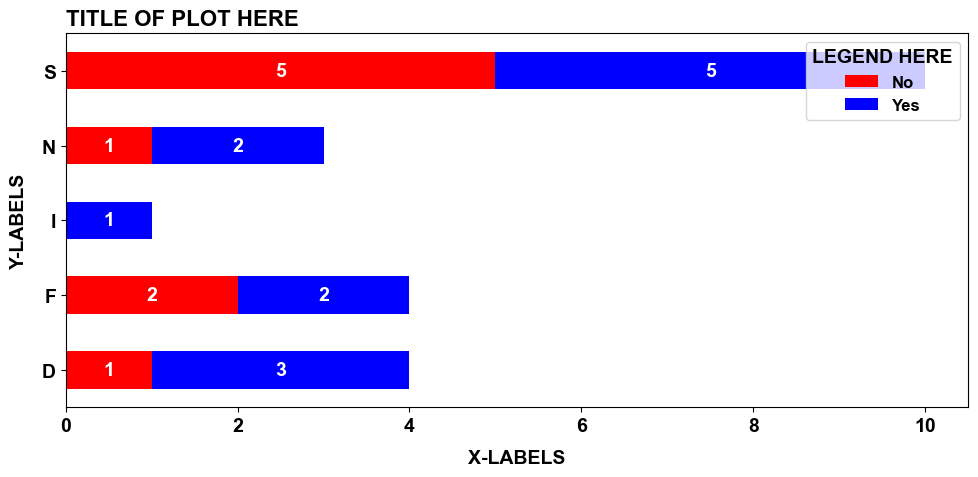

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set global font properties for consistency
plt.rcParams.update({'font.family': 'Arial', 'font.size': 14, 'font.weight': 'bold'})

# Read the CSV data
df = pd.read_csv('bar_assignment.csv')

# Transform 1 to "Yes" and 0 to "No"
df['Response'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Group by LABEL and Response, then count occurrences
counts = df.groupby(['LABEL', 'Response']).size().unstack(fill_value=0)

# Reorder columns to ensure "Yes" is plotted first (left side)
counts = counts[['No', 'Yes']]  # Ensures "No" (red) appears first, like the image

# Create a horizontal stacked bar chart
ax = counts.plot(kind='barh', stacked=True, color=['red', 'blue'], figsize=(10, 5))

# Add labels inside the bars (only if count > 0)
for index, (no, yes) in enumerate(zip(counts['No'], counts['Yes'])):
    if no > 0:
        plt.text(no / 2, index, str(no), ha='center', va='center', color='white', fontsize=14, fontweight='bold')
    if yes > 0:
        plt.text(no + yes / 2, index, str(yes), ha='center', va='center', color='white', fontsize=14, fontweight='bold')

# Formatting the title and labels to match the image style
plt.title('TITLE OF PLOT HERE', fontsize=16, fontweight='bold', loc='left')
plt.xlabel('X-LABELS', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Y-LABELS', fontsize=14, fontweight='bold', labelpad=10)

# Adjust legend position to top-left
plt.legend(title='LEGEND HERE', loc='upper right', fontsize=12, title_fontsize=14)

# Remove grid lines to match image style
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()
